In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/total-active-load-wcci/total_active_load_wcci.csv
/kaggle/input/rte-case5-load/total_active_load.csv
/kaggle/input/total-load/total_load.csv
/kaggle/input/ieee14-load/total_active_load_14.csv
/kaggle/input/tensorboard-logs-case14/events.out.tfevents.1703012134.cgpu01-009
/kaggle/input/tensorboard-logs-case14/events.out.tfevents.1702969368.cgpu01-012
/kaggle/input/tensorboard-logs-case14/events.out.tfevents.1702967508.cgpu01-011
/kaggle/input/tensorboard-logs-case14/events.out.tfevents.1703006171.cgpu01-008


Validation:

In [14]:
case14_0 = pd.read_csv("/kaggle/input/case14-epsi-0/score.csv", header=None)
case14_03 = pd.read_csv("/kaggle/input/case14-epsi03/score.csv", header=None)
case14_05 = pd.read_csv("/kaggle/input/case14-epsi05/score.csv", header=None)
case14_07 = pd.read_csv("/kaggle/input/case14-epsi-07/score.csv", header=None)
case14_10 = pd.read_csv("/kaggle/input/case1-epsi-1/score.csv", header=None)

In [120]:
casewcci_0 = pd.read_csv("/kaggle/input/wcci-0-sc/score.csv", header=None)
casewcci_03 = pd.read_csv("/kaggle/input/wcci-03-sc/score.csv", header=None)
casewcci_05 = pd.read_csv("/kaggle/input/wcci-05-sc/score.csv", header=None)
casewcci_07 = pd.read_csv("/kaggle/input/wcci-07-sc/score.csv", header=None)
casewcci_10 = pd.read_csv("/kaggle/input/wcci-10-sc/score.csv", header=None)

In [121]:
new_df = pd.DataFrame(columns=['agent_0','agent_03','agent_05','agent_07','agent_10'], index=np.arange(10))

In [3]:
# for case 5
new_df = pd.DataFrame(columns=['agent_0','agent_03','agent_07'], index=np.arange(5))

In [93]:
datasets = [case14_0,case14_03,case14_05,case14_07,case14_10]

In [122]:
datasets = [casewcci_0,casewcci_03,casewcci_05,casewcci_07,casewcci_10]

In [5]:
for each_d in range(len(datasets)):
    last_row = datasets[each_d].iloc[-1]
    col_name = new_df.columns[each_d]
    new_df.loc[:,col_name] = last_row

In [2]:
df = pd.read_csv('/kaggle/input/rte-case5-load/total_active_load.csv')
df.head()

,0
0,24.8
1,24.6
2,24.7
3,24.6
4,24.4


In [ ]:
from matplotlib import colors

cmap=colors.LinearSegmentedColormap.from_list('rg',["r","w","g"], N=256) 


def background_gradient(s, cmap='PuBu', low=0, high=0):
    s = pd.to_numeric(s, errors='coerce')
    m = s.min() #<---------- here
    M = s.max() #<-----------here
    rng = M - m
    norm = colors.TwoSlopeNorm(vmin=m - (rng * low), vcenter=0., vmax=M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

# x = df.apply(pd.to_numeric, errors='coerce')
new_df.style.apply(background_gradient,
               cmap=cmap,
               low=0.5,
               high=0.5, subset=pd.IndexSlice[:, ['agent_0', 'agent_03', 'agent_07']],  axis=1
              )


In [119]:
import plotly.graph_objects as go
from plotly.colors import n_colors
import numpy as np
np.random.seed(1)

colors = n_colors('rgb(255, 200, 200)', 'rgb(200, 0, 0)', 865, colortype='rgb')
a = list(new_df.loc[:,'agent_0'])
b = list(new_df.loc[:,'agent_03'])
c = list(new_df.loc[:,'agent_05'])
d = list(new_df.loc[:,'agent_07'])
e = list(new_df.loc[:,'agent_10'])

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>agent_0</b>', '<b>agent_03</b>', '<b>agent_05</b>', '<b>agent_07</b>', '<b>agent_10</b>'],
    line_color='white', fill_color='white',
    align='center',font=dict(color='black', size=12)
  ),
  cells=dict(
    values=[a, b, c, d,e],
    line_color=[np.array(colors)[a],np.array(colors)[b], np.array(colors)[c], np.array(colors)[d], np.array(colors)[e]],
    fill_color=[np.array(colors)[a],np.array(colors)[b], np.array(colors)[c], np.array(colors)[d], np.array(colors)[e]],
    align='center', font=dict(color='white', size=11)
    ))
])

fig.show()

Test - action distribution

In [6]:

agent_0_wcci = pd.read_json("/kaggle/input/agent-0-actions/act_substation_dict.json",lines=True)
agent_0_ips = pd.read_json("/kaggle/input/agent-0-actions/act_substation_dict_neurips.json",lines=True,orient='columns')
agent_10_wcci = pd.read_json("/kaggle/input/agent-10-actions/act_substation_dict.json",lines=True,orient='columns')
agent_10_ips = pd.read_json("/kaggle/input/agent-10-actions/act_substation_dict_neurips.json",lines=True,orient='columns')


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

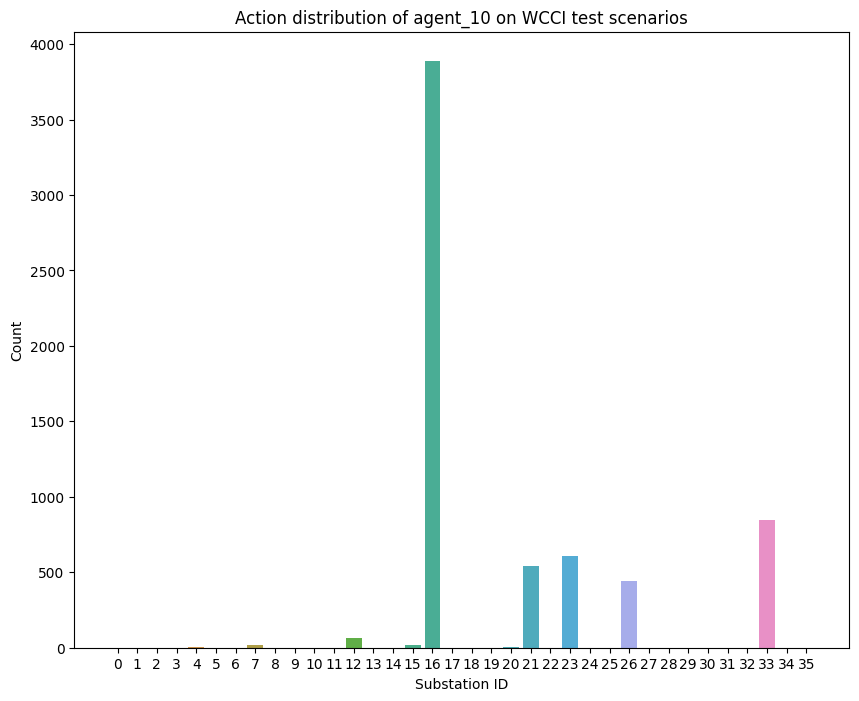

In [17]:
fig = plt.figure(figsize=(10,8))
sns.barplot(x = agent_10_wcci.columns,
            y = agent_10_wcci.iloc[0,:])
plt.title('Action distribution of agent_10 on WCCI test scenarios')
plt.xlabel('Substation ID')
plt.ylabel('Count')
plt.plot()
plt.savefig("agent_10_wcci.pdf", format="pdf", bbox_inches="tight")

In [3]:
df = df.rename(columns={'0': 'total'})

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

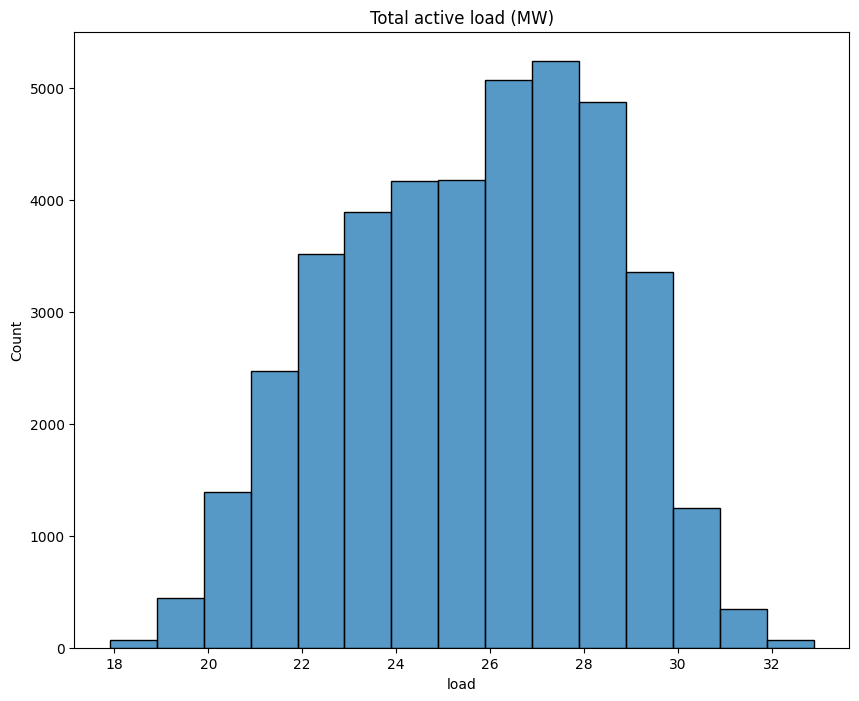

In [5]:
fig = plt.figure(figsize=(10,8))
sns.histplot(data=df, x='total', binwidth=1)
plt.title('Total active load (MW)')
plt.xlabel('load')
plt.plot()
plt.savefig("Tactive_load.pdf", format="pdf", bbox_inches="tight")

In [6]:
df_14 = pd.read_csv('/kaggle/input/ieee14-load/total_active_load_14.csv')
df_14.head()

,0
0,247.2
1,250.4
2,248.2
3,247.5
4,248.3


In [7]:
df_14 = df_14.rename(columns={'0': 'total'})

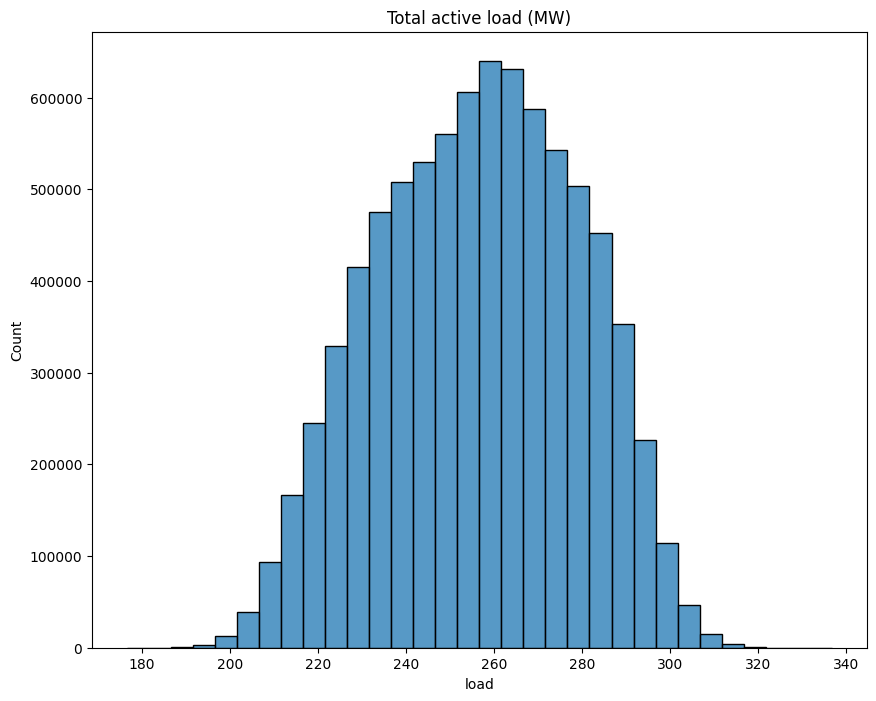

In [8]:
fig = plt.figure(figsize=(10,8))
sns.histplot(data=df_14, x='total',binwidth=5)
plt.title('Total active load (MW)')
plt.xlabel('load')
plt.plot()
plt.savefig("Tactive_load_14.pdf", format="pdf", bbox_inches="tight")

[]

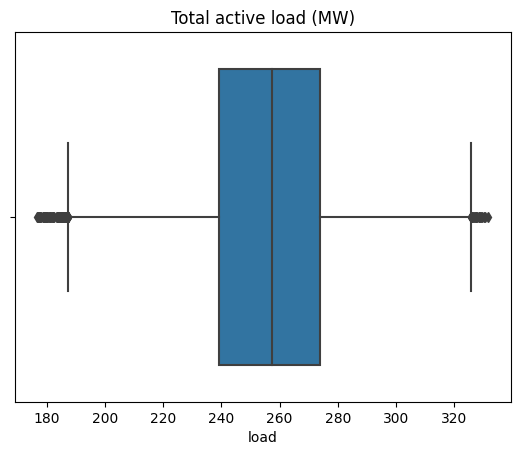

In [9]:
sns.boxplot(x=df_14["total"])
plt.title('Total active load (MW)')
plt.xlabel('load')
plt.plot()
#plt.savefig("Boxplot_Tactive_load_wcci.pdf", format="pdf", bbox_inches="tight")

In [10]:
df_wcci = pd.read_csv('/kaggle/input/total-active-load-wcci/total_active_load_wcci.csv')
df_wcci.head()

,0
0,578.86
1,577.54
2,574.68
3,574.85
4,562.59


In [11]:
df_wcci = df_wcci.rename(columns={'0': 'total'})

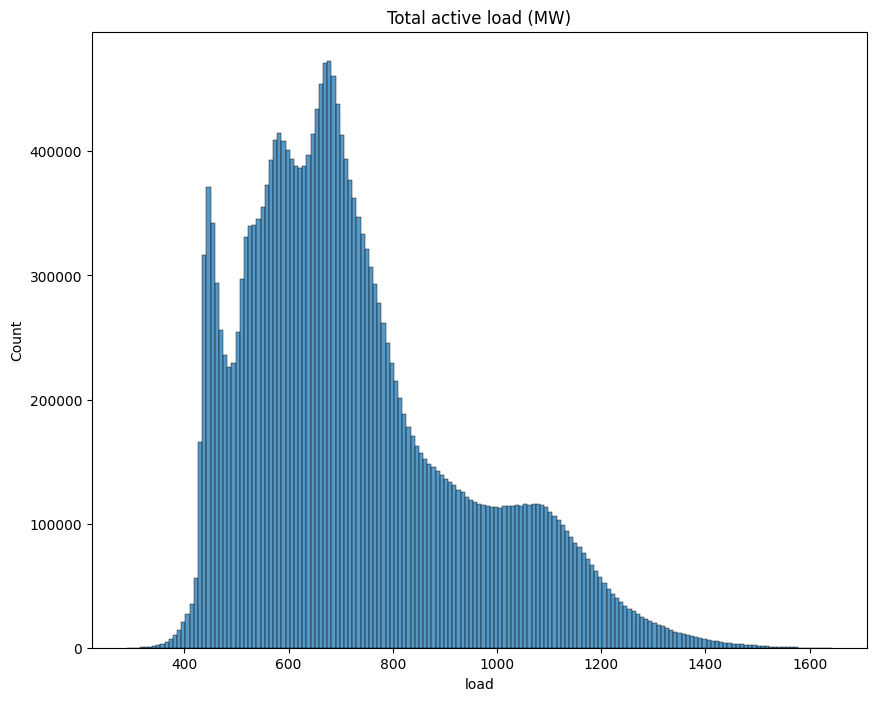

In [12]:
fig = plt.figure(figsize=(10,8))
sns.histplot(data=df_wcci, x='total',binwidth=8)
plt.title('Total active load (MW)')
plt.xlabel('load')
plt.plot()
plt.savefig("Tactive_load_wcci.pdf", format="pdf", bbox_inches="tight")

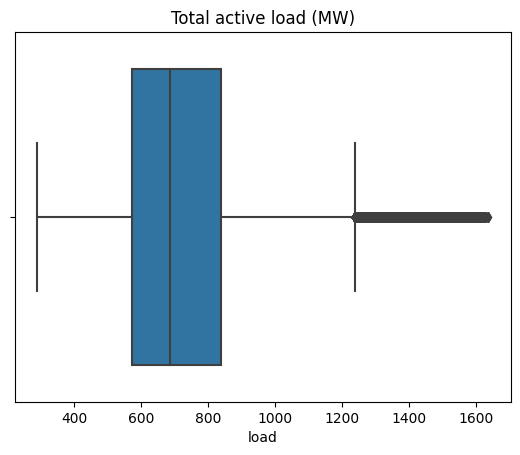

In [13]:
sns.boxplot(x=df_wcci["total"])
plt.title('Total active load (MW)')
plt.xlabel('load')
plt.plot()
plt.savefig("Boxplot_Tactive_load_wcci.pdf", format="pdf", bbox_inches="tight")

In [14]:
df = df.rename(columns={'total':'Total load'})
df_14 = df_14.rename(columns={'total':'Total load'})
df_wcci = df_wcci.rename(columns={'total':'Total load'})

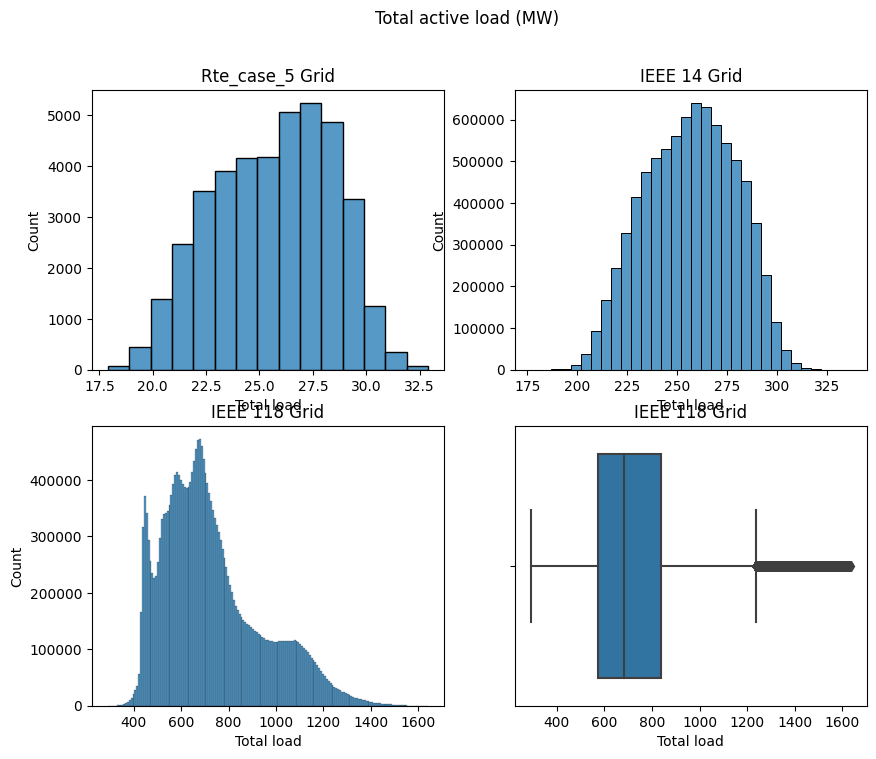

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
fig.suptitle('Total active load (MW)')
sns.histplot(data=df, x='Total load', binwidth=1, ax=axes[0,0])
axes[0,0].set_title('Rte_case_5 Grid')
sns.histplot(data=df_14, x='Total load',binwidth=5, ax=axes[0,1])
axes[0,1].set_title('IEEE 14 Grid')
sns.histplot(data=df_wcci, x='Total load',binwidth=8, ax=axes[1,0])
axes[1,0].set_title('IEEE 118 Grid')
#axes[1,0].xlabel('load')
sns.boxplot(x=df_wcci["Total load"], ax=axes[1,1])
axes[1,1].set_title('IEEE 118 Grid')
#axes[1,1].xlabel('load')
plt.plot()
plt.savefig("All_Tactive_load.pdf", format="pdf", bbox_inches="tight")